In [1]:
from Manipulator2DMap.Map import GridMap2D
from Manipulator2DMap.Manipulator2D import Manipulator_2d_supervisor, PI
from Manipulator2DMap.obstacle import SphereObstacle
from Manipulator2DMap.inverse_kinematics import inverse_kinematics
from AStarDefaults.SearchTreeNode import SearchTreeNode
from AStarDefaults.AStar import make_path
from RRTDefaults.rrt import create_rrt

import numpy as np
import matplotlib.pyplot as plt
import itertools
import time
import heapq
from matplotlib.widgets import Slider
from ipywidgets import interact

%matplotlib inline

In [2]:
N_JOINTS = 4

args_dict = {
    'num_joints': N_JOINTS,
    'lengths': [5, 7, 5, 5],
    'angle_discretization': 180,
    'angles_constraints': np.array([PI / 6] * N_JOINTS)
}

In [3]:
manipulator = Manipulator_2d_supervisor(**args_dict)

state = manipulator.generate_random_state()
state

array([ 1.08210414,  2.44346095, -1.36135682, -2.16420827])

In [4]:
goal_position = ((-10, 5.5), -PI/ 2)

manipulator = Manipulator_2d_supervisor(**args_dict)

In [5]:
sphere_obstacle1 = SphereObstacle(np.array([-5, 5]), 3)
sphere_obstacle2 = SphereObstacle(np.array([-10, 10]), 2)

In [6]:
space_map = GridMap2D(manipulator, state, goal_position, obstacles=[sphere_obstacle1, sphere_obstacle2])

print goal position [-10.    5.5]


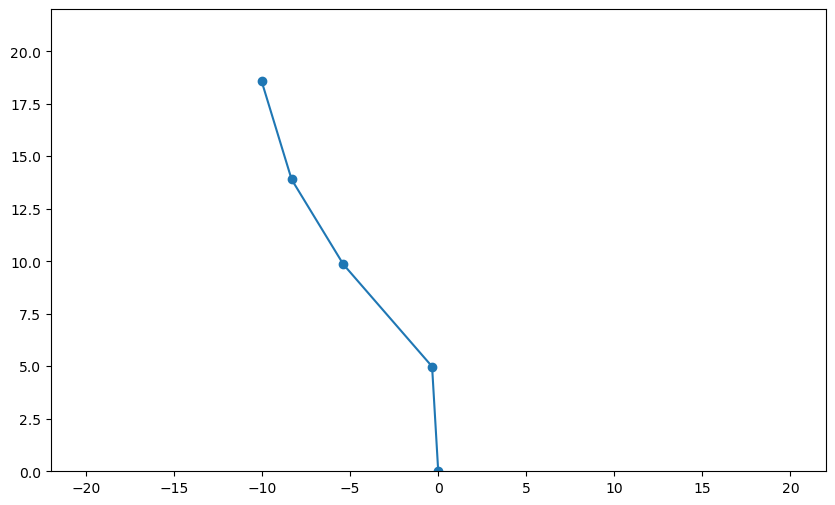

In [7]:
if space_map.get_start() is None:
    space_map.random_init_start()
manipulator.visualize_state(space_map.get_start())

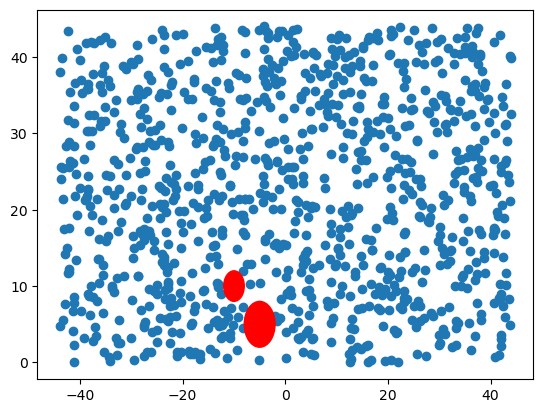

In [8]:
points = np.array([space_map.sample_point_on_map() for _ in range(1000)])
plt.scatter(points[:, 0], points[:,1])
for sphere in space_map._obstacles:    
    c = plt.Circle(sphere.center, sphere.r, color='r')
    plt.gca().add_artist(c)
plt.show()

In [11]:
nodes_list, num_iters = create_rrt(space_map, 2500)
print(num_iters)

100%|███████████████████████████████████████| 2500/2500 [06:56<00:00,  6.00it/s]

2500


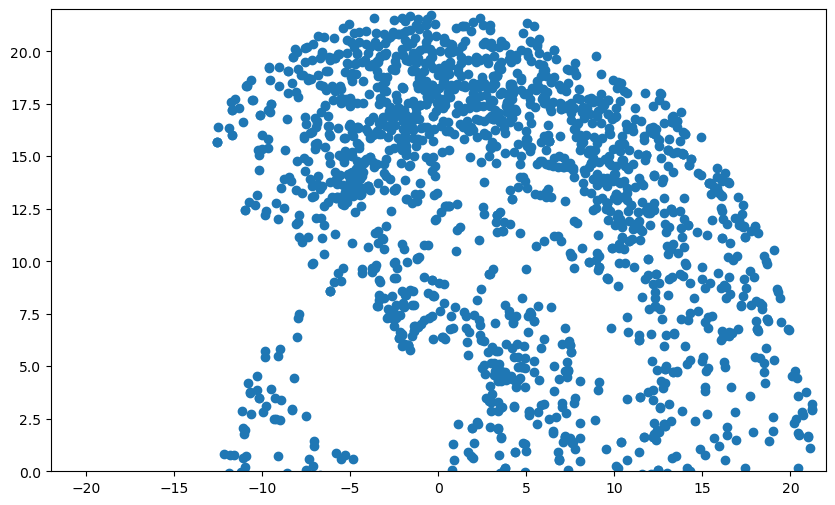

In [12]:
x_massive = []
y_massive = []

for state in nodes_list[1:]:
    x, y = space_map._manipulator.calculate_end(state.get_state())
    x_massive.append(x)
    y_massive.append(y)

    # x_par, y_par = sup.calculate_end(state.parent.get_state())
    # plt.plot([x_par, x], [y_par, y])


r = space_map._manipulator.radius
plt.figure(figsize=(10,6))
plt.axis([-r, r, 0, r])
plt.scatter(x_massive, y_massive)
plt.show()